In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import copy

In [147]:
class system(object):
    def __init__(self):
        self.N = 2
        self.A=np.eye(self.N)
        self.B=np.ones([self.N,1])
        self.C=np.ones([self.N,1])
        self.initial_state = np.random.normal(size=[self.N,1]) *0.01
        
    def update_param(self):
        
        self.A +=np.random.normal(size=[self.N,self.N]) *0.001
        self.B +=np.random.normal(size=[self.N,1]) *0.001
        self.C +=np.random.normal(size=[self.N,1]) *0.001
        self.initial_state += np.random.normal(size=[self.N,1])*0.01
        return self
    
    def next_state(self,state,system_input):
        return self.A @ state + self.B *system_input
    
    def output(self,state):
        return np.ravel(np.dot(self.C.T,state))
    
    def predict(self,u):
        state = self.initial_state
        y = []
        for i in range(len(u)):
            state = self.next_state(state,u[i])
            y.append(self.output(state))
            
        return np.array(y)

In [148]:
t = np.linspace(0,6,1000)

u = np.sin(t)
teach = (u*2)
tmp = np.inf

t = t.reshape(-1,1)

best_model = system()

while True:
    best_model = system()
    if not (score == np.nan or score == np.inf):
        initial_best_model = system()
        break
        
for i in range(100):    
    s = best_model.update_param()
    pred = s.predict(u)
    score = np.linalg.norm(teach-pred)

    if  score < tmp:
        tmp = score
        best_model = copy.deepcopy(s)
        print(i,tmp)
        
    if (score == np.nan or score == np.inf):
       best_model = copy.deepcopy(initial_best_model) 
    

0 470261.441316
2 325281.299892
52 233343.633113
53 192893.095076
54 150022.623656
56 141797.806547


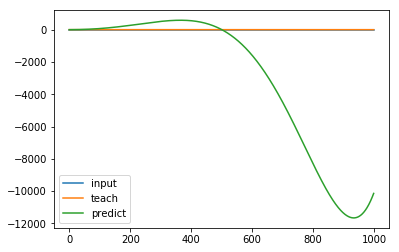

In [149]:
plt.plot(u,label = 'input')
plt.plot(teach,label = 'teach')
plt.plot(best_model.predict(u),label='predict')
plt.legend()